In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
from sklearn import datasets
data = datasets.fetch_california_housing(as_frame=True)
X=data.data
Y=data.target
df=pd.DataFrame(X,columns=data.feature_names)
df['price']=Y

Another way to convert dataset to pandas dataframe

In [ ]:
#from sklearn import datasets
#data = datasets.fetch_california_housing()
#df=pd.DataFrame(data.data,columns=data.feature_names)
#df['price']=data.target

In [ ]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
correlation=df.corr()


<Axes: >

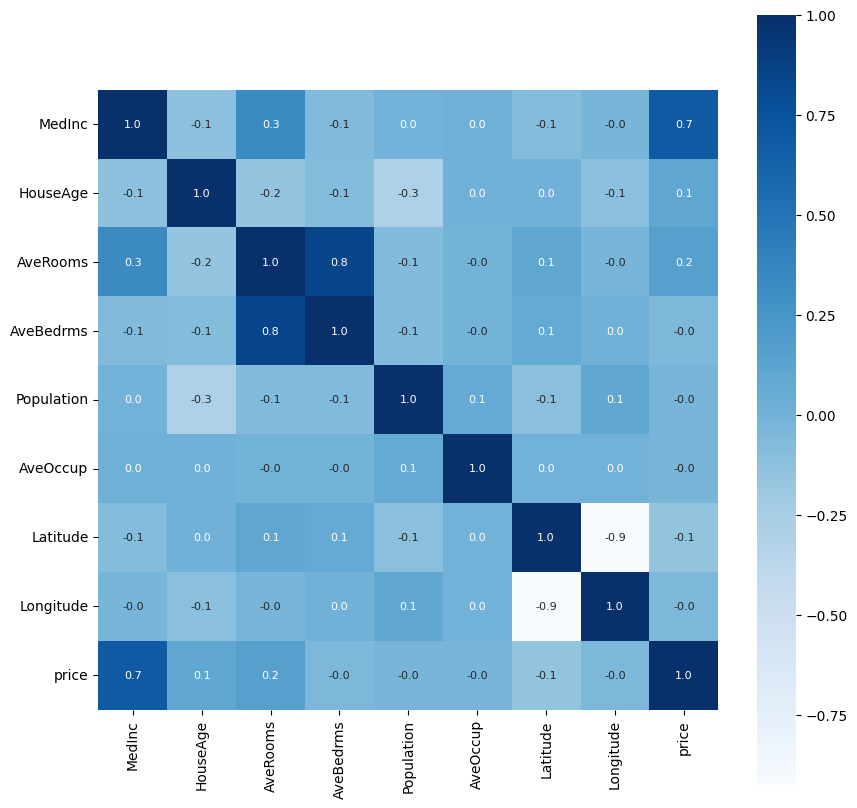

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_train_Prediction=model.predict(X_train)

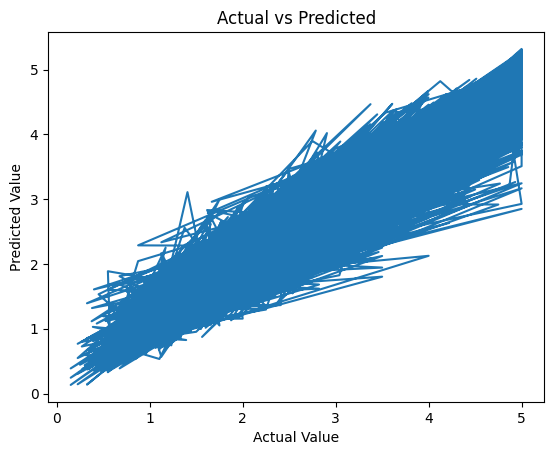

In [ ]:
plt.plot(Y_train,Y_train_Prediction)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
Y_test_Prediction=model.predict(X_test)

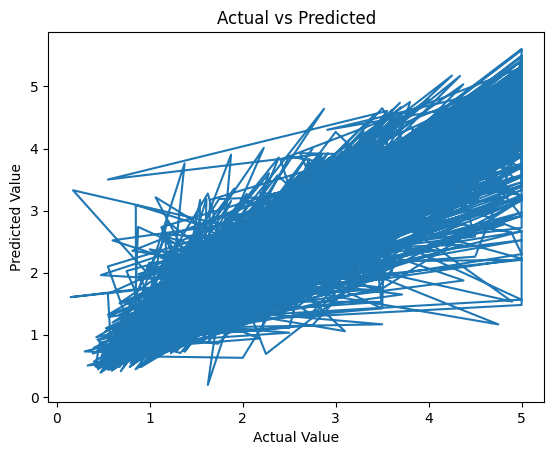

In [ ]:
plt.plot(Y_test,Y_test_Prediction)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
score_1=r2_score(Y_train,Y_train_Prediction)
print(score_1)
score_2=mean_squared_error(Y_train,Y_train_Prediction)
print(score_2)

0.943650140819218
0.0748112971690747


In [ ]:
score_1=r2_score(Y_test,Y_test_Prediction)
print(score_1)
score_2=mean_squared_error(Y_test,Y_test_Prediction)
print(score_2)

0.8338000331788725
0.22387540906811954


In [ ]:
sample_data=[3.1200,	52.0,	4.797527,	1.061824,	1157.0,	1.788253,	37.84,	-122.25	]

In [ ]:
sample_data=np.asarray(sample_data).reshape(1,-1)

In [ ]:
predit_price=model.predict(sample_data)
print(predit_price)

[2.4689782]
